In [14]:
import time

start_time = time.time()

### Importações das Bibs Necessárias


In [15]:
from Bio import SeqIO, AlignIO
from Bio.Seq import Seq
from Bio.SeqRecord import SeqRecord
from Bio.Align import MultipleSeqAlignment
from Bio.Align.Applications import ClustalOmegaCommandline
import matplotlib.pyplot as plt
import os
# import tempfile

### Leitura das Sequências

Recebe o path do arquivo fasta e retorna array com sequências


In [16]:
def read_sequences(gene_file_path):
    gene_sequences = []
    seq_counter = 1

    with open(gene_file_path) as handle:
        for record in SeqIO.parse(handle, "fasta"):
            # Criar um nome único para cada sequência
            unique_name = f"seq_{seq_counter}"
            seq_counter += 1

            # Criar um objeto SeqRecord com a sequência e informações adicionais
            seq_record = SeqRecord(record.seq, id=unique_name, name=unique_name,
                                   description=record.description)
            # Adicionar o objeto SeqRecord à lista
            gene_sequences.append(seq_record)

    # number_sequences = len(gene_sequences)
    # print('number of sequences in file', gene_file_path, ' = ', number_sequences)
    return gene_sequences


### Leitura da sequência de referência

In [17]:
def read_reference_sequence(reference_file_path):
    with open(reference_file_path) as handle:
        reference_sequence = "".join(line.strip().lower() for line in handle)
    return reference_sequence

### Alinhamento Múltiplo

Recebe as sequências genicas e realiza o alinhamento com o ClutalOmega


In [18]:
def alignment_with_reference_all_sequences(reference_sequence, gene_sequences):
    input_file = "input.fasta"
    output_file = "output.fasta"

    # Adiciona a sequência de referência ao arquivo "input.fasta"
    fake_reference = SeqRecord(Seq(reference_sequence), id="reference")
    with open(input_file, "w") as handle:
        SeqIO.write([fake_reference] + gene_sequences, handle, "fasta")

    # Executa o alinhamento usando o Clustal Omega
    clustalomega_cline = ClustalOmegaCommandline(
        infile=input_file,
        outfile=output_file,
        verbose=True,
        auto=True
    )
    clustalomega_cline()

    # Remove os arquivos temporários
    os.remove(input_file)

    # Lê o arquivo de saída do alinhamento
    alignment = AlignIO.read(output_file, "fasta")
    os.remove(output_file)

    return alignment

### Visualização dos Resultados

In [19]:
def visualize_alignment(alignment):
    # Calcula o percentual de identidade para cada posição do alinhamento
    identity_percentages = []
    for column in range(alignment.get_alignment_length()):
        column_data = alignment[:, column]
        identity_percentage = column_data.count(column_data[0]) / len(column_data) * 100
        identity_percentages.append(identity_percentage)

    # Plota o gráfico de percentual de identidade
    plt.plot(identity_percentages)
    plt.xlabel("Position")
    plt.ylabel("Identity Percentage")
    plt.title("Identity Percentage by Position")
    plt.show()



### Função para salvar o resultado do alinhamento em um arquivo

In [20]:
def save_alignment_to_file(alignment, output_file_path):
    # Salva o alinhamento no arquivo sem a sequência de referência
    with open(output_file_path, "w") as handle:
        alignment_without_reference = MultipleSeqAlignment([record for record in alignment if record.id != "reference"])
        AlignIO.write(alignment_without_reference, handle, "fasta")

### Main


In [22]:
# Diretório principal onde estão as pastas com os arquivos gene_spike.fasta
main_directory = "/home/maume/UnEB/TCC/Dataset/sequencias_teste_bkp"

#Caminho para o arquivo com a seq de referência
reference_sequence_path = "/home/maume/UnEB/TCC/Implementation/refSpike.fasta"

# Lista de todas as pastas dentro do diretório principal
folders = [f for f in os.listdir(main_directory) if os.path.isdir(os.path.join(main_directory, f))]

# Variáveis para acompanhar o número de arquivos, sequencias e genes não processados
sequences_processed = 0

# Loop através das pastas
for folder in folders:
    # Caminho completo para a pasta atual
    folder_path = os.path.join(main_directory, folder)

    # Caminho completo para o arquivo gene_spike.fasta na pasta atual
    gene_file_path = os.path.join(folder_path, "gene_spike.fasta")

    # Lê a sequência de referência uma vez para economizar tempo de processamento
    reference_sequence = read_reference_sequence(reference_sequence_path)

    # Lê as sequências do arquivo gene_spike.fasta
    gene_sequences = read_sequences(gene_file_path)
    sequences_processed += len(gene_sequences)

    # Realiza o alinhamento com referência
    print(f'Processando arquivo: {gene_file_path}')
    alignment = alignment_with_reference_all_sequences(reference_sequence, gene_sequences)
    print(f'Total de sequências já processadas: {sequences_processed}')

    # Caminho completo para salvar o resultado do alinhamento na pasta atual
    output_file_path = os.path.join(folder_path, "alignment.fasta")

    # Salva o resultado do alinhamento na pasta atual
    save_alignment_to_file(alignment, output_file_path)

print('Busca Completa Concluída.')

### FORMA ANTIGA COM 1 ARQUIVO

# # Realiza a leitura das sequências
# gene_sequences = read_sequences(gene_file_path)

# # Lê a sequência de referência
# reference_sequence = read_reference_sequence(gene_reference_path)

# # Realiza o sequenciamento múltiplo com o Clustal Omega
# alignment = alignment_with_reference_all_sequences(reference_sequence, gene_sequences)

# visualize_alignment(alignment)

# print('Busca Completa Concluída.')

number of sequences in file /home/maume/UnEB/TCC/Dataset/sequencias_teste_bkp/A.1/gene_spike.fasta  =  1839
Processando arquivo: /home/maume/UnEB/TCC/Dataset/sequencias_teste_bkp/A.1/gene_spike.fasta


KeyboardInterrupt: 

In [ ]:
from datetime import datetime

end_time = time.time()

elapsed_time = end_time - start_time
current_datetime = datetime.now().strftime('%Y-%m-%d %H:%M:%S')

print(elapsed_time)
print(current_datetime)

1204.8891406059265
2023-09-12 09:16:09


          a         c         g     k    m     n     r         t     y
a 7361054.0       0.0    1367.5   0.0  0.0 285.0 111.5     219.5   0.0
c       0.0 4730609.0     165.0   0.0 57.5 396.0   0.0     835.5 114.0
g    1367.5     165.0 4594632.0  58.5  0.0  57.0  56.0     780.5   0.0
k       0.0       0.0      58.5   6.0  0.0   0.0   0.0     280.5   0.0
m       0.0      57.5       0.0   0.0  0.0   0.0   0.0       0.0   0.0
n     285.0     396.0      57.0   0.0  0.0   0.0   0.0     456.0   0.0
r     111.5       0.0      56.0   0.0  0.0   0.0   0.0       0.0   0.0
t     219.5     835.5     780.5 280.5  0.0 456.0   0.0 8275354.0  57.0
y       0.0     114.0       0.0   0.0  0.0   0.0   0.0      57.0   0.0



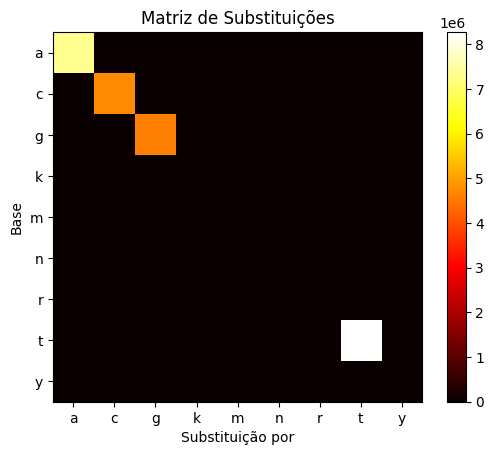

In [ ]:
import numpy as np

print(alignment.substitutions)

# Obter a matriz de substituições do alinhamento
substitutions = alignment.substitutions

# Lista com as bases representadas na matriz
bases = ['a', 'c', 'g', 'k', 'm', 'n', 'r', 't', 'y']

# Cria o heatmap
plt.imshow(substitutions, cmap='hot', interpolation='nearest')
plt.colorbar()

# Define os rótulos dos eixos x e y com as bases
plt.xticks(np.arange(len(bases)), bases)
plt.yticks(np.arange(len(bases)), bases)

# Exibe o gráfico
plt.xlabel('Substituição por')
plt.ylabel('Base')

plt.title('Matriz de Substituições')

plt.show()

In [ ]:
output_alinhamento = "/home/maume/UnEB/TCC/Dataset/sequencias_teste_bkp/A.2/alinhamento.fasta"
with open(output_alinhamento, "w") as f:
        AlignIO.write(alignment, f, "fasta")

### Salvando Informações Sobre a Execução

In [ ]:
# import platform
# import psutil

# machine_info = platform.uname()
# memory_info = psutil.virtual_memory()

# path_directory = '/home/maume/UnEB/TCC/Implementation/pipeline_BLAST'

# content = '============================================================\n'
# content += 'Informações Sobre a Última Execução:\n\n'
# content += f'- Quantidade de Variantes Analisadas: {files_processed}\n'
# content += f'- Quantidade de Genomas Analisados: {sequences_processed}\n'
# content += f'- Quantidade de Genomas em que o Gene não foi Encontrado: {genes_not_found}\n'
# content += f'- Data e Hora da Execução: {current_datetime}\n'
# content += f'- Tempo Total de Execução: {round(elapsed_time, 2)} Segundos\n'
# content += f'- Caminho do Dataset Utilizado: {root_directory}\n'
# content += f'\nInformações Sobre a Máquina Utilizada\n\n'
# content += f'- S.O.: Ubuntu 22.04.2 LTS x86_64\n'
# content += f'- Kernel: {machine_info.release}\n'
# content += f'- CPU: Intel i7-6500U (4) @ 3.100GHz {machine_info.processor}\n'
# content += f'- Total de Memória: {round(memory_info.total / (1024 ** 3), 2)}GB\n'


# output_file_name = 'execution_information.txt'
# output_file_path = os.path.join(path_directory, output_file_name)

# with open(output_file_path, 'a') as output_file:
#     output_file.write(content)

# print(f'Information saved to file: {output_file_path}')